# RL Runs - Analysis

I previously generated 105 runs of the RL only War and Reason model from EUGene data, using a 16-core AWS server. Now I'm going to analyze them.

In [1]:
import pickle

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
all_data = []
for i in range(105):
    filename = "data_out/ex1_1_{}.pickle".format(i)
    zip_file = filename + ".tar.bz2"
    !tar -jxvf $zip_file 
    df = pd.read_pickle(filename)
    df["Iteration"] = i
    #df["Outcome_sub"] = df.Outcome.str.slice(0, 3)
    #df["Model_Outcome_sub"] = df.Model_Outcome.str.slice(0, 3)
    
    all_data.append(df)
    !rm $filename

x data_out/ex1_1_0.pickle
x data_out/ex1_1_1.pickle
x data_out/ex1_1_2.pickle
x data_out/ex1_1_3.pickle
x data_out/ex1_1_4.pickle
x data_out/ex1_1_5.pickle
x data_out/ex1_1_6.pickle
x data_out/ex1_1_7.pickle
x data_out/ex1_1_8.pickle
x data_out/ex1_1_9.pickle
x data_out/ex1_1_10.pickle
x data_out/ex1_1_11.pickle
x data_out/ex1_1_12.pickle
x data_out/ex1_1_13.pickle
x data_out/ex1_1_14.pickle
x data_out/ex1_1_15.pickle
x data_out/ex1_1_16.pickle
x data_out/ex1_1_17.pickle
x data_out/ex1_1_18.pickle
x data_out/ex1_1_19.pickle
x data_out/ex1_1_20.pickle
x data_out/ex1_1_21.pickle
x data_out/ex1_1_22.pickle
x data_out/ex1_1_23.pickle
x data_out/ex1_1_24.pickle
x data_out/ex1_1_25.pickle
x data_out/ex1_1_26.pickle
x data_out/ex1_1_27.pickle
x data_out/ex1_1_28.pickle
x data_out/ex1_1_29.pickle
x data_out/ex1_1_30.pickle
x data_out/ex1_1_31.pickle
x data_out/ex1_1_32.pickle
x data_out/ex1_1_33.pickle
x data_out/ex1_1_34.pickle
x data_out/ex1_1_35.pickle
x data_out/ex1_1_36.pickle
x data_out/

In [3]:
data = pd.concat(all_data)

In [4]:
data.head()

,year,ccode1,ccode2,Outcome,Equilibrium,Model_Outcome,Move_Quality,Iteration
0,1816,2,200,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0
1,1816,2,210,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0
2,1816,2,220,StatusQuo,eqTacqa,Capitulate_A2,0.400000,0
3,1816,2,225,StatusQuo,eqTacqa,Capitulate_B2,0.333333,0
4,1816,2,230,Capitulate_B,eqTacqa,Capitulate_B2,0.333333,0


In [5]:
len(data)

107907660

In [6]:
all_data = None

In [11]:
outcome_crosswalk = {
    "Capitulate_A2": "Capitulate_A",
    "Capitulate_A1": "Capitulate_A",
    "Capitulate_B2": "Capitulate_B",
    "Capitulate_B1": "Capitulate_B",
    "Negotiate_1": "Negotiation",
    "Negotiate_2": "Negotiation",
    "War_A1": "War",
    "War_A2": "War",
    "War_B1": "War",
    "War_B2": "War"
}

In [12]:
data["Model_Outcome_sub"] = data.Model_Outcome.replace(outcome_crosswalk)

In [13]:
data.head()

,year,ccode1,ccode2,Outcome,Equilibrium,Model_Outcome,Move_Quality,Iteration,Model_Outcome_sub
0,1816,2,200,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0,Acquiesce_B
1,1816,2,210,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0,Acquiesce_B
2,1816,2,220,StatusQuo,eqTacqa,Capitulate_A2,0.400000,0,Capitulate_A
3,1816,2,225,StatusQuo,eqTacqa,Capitulate_B2,0.333333,0,Capitulate_B
4,1816,2,230,Capitulate_B,eqTacqa,Capitulate_B2,0.333333,0,Capitulate_B


In [14]:
data["Model_Correct"] = 0
data.loc[(data.Outcome==data.Model_Outcome_sub), "Model_Correct"] = 1

## Visualize fraction of equilibrium outcomes

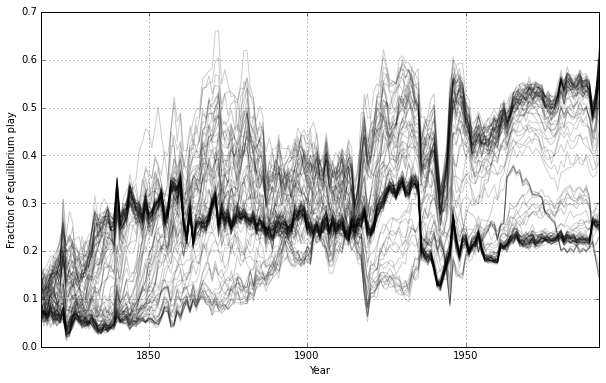

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year").aggregate(lambda x: len(x[x.Move_Quality==1])/len(x))["ccode1"]
    #ax.plot(s, c='k', alpha=0.2)
    s.plot(c='k', alpha=0.2)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)

## Visualize fraction of historically-correct outcomes

In [27]:
data.Outcome.unique()

array(['StatusQuo', 'Capitulate_B', 'Capitulate_A', 'Negotiation',
       'Acquiesce_B', 'War', 'Acquiesce_A'], dtype=object)

In [28]:
data.Model_Outcome.uniqueque()

array(['Acquiesce_B', 'Capitulate_A2', 'Capitulate_B2', 'Negotiate_1',
       'Capitulate_A1', 'War_B2', 'War_B1', 'War_A1', 'Capitulate_B1',
       'StatusQuo', 'Acquiesce_A', 'Negotiate_2', 'War_A2'], dtype=object)

In [26]:
data.Model_Correct.mean()

0.025302930301704253

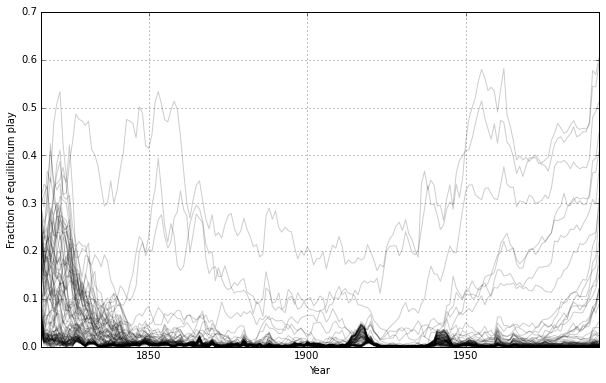

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year")["Model_Correct"].aggregate("mean")
    s.plot(c='k', alpha=0.2, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)

In [30]:
final_rate = data[data.year==data.year.max()].groupby("Iteration")["Model_Correct"]\
                .aggregate("mean")

In [31]:
#better_than = len(final_rate[final_rate>(1/13)])
better_than = len(final_rate[final_rate>0.07])
print(better_than)
print(better_than / len(final_rate))

18
0.17142857142857143


In [18]:
subset = data[data.Iteration.isin(final_rate[final_rate>0.5].index)]

In [19]:
cols = ["Iteration", "year", "ccode1", "ccode2", "Equilibrium", "Outcome", "Model_Outcome"]
subset = subset[cols]
subset.to_csv("RL_Subset.csv", index=False)

# Regressions

In [15]:
data = data[data.year>1850]

In [17]:
observed_outcomes = pd.get_dummies(data.Outcome)
model_outcomes = pd.get_dummies(data.Model_Outcome_sub)
model_outcomes["Const."] = 1
regressors = [col for col in model_outcomes.columns if col != "StatusQuo"]

In [12]:
observed_outcomes.columns

Index(['Acquiesce_A', 'Acquiesce_B', 'Capitulate_A', 'Capitulate_B',
       'Negotiation', 'StatusQuo', 'War'],
      dtype='object')

In [ ]:
full_logits = {}
for col in observed_outcomes.columns:
    full_logits[col] = sm.Logit(observed_outcomes[col], model_outcomes[regressors]).fit()
    print(col)

## Iterated

In [ ]:
results = {}
non_converged = 0
errors = 0
for i, group in data.groupby("Iteration"):
    observed_outcomes = pd.get_dummies(group.Outcome)
    rl_predictions = pd.get_dummies(group.Model_Outcome)
    rl_predictions["Const."] = 1
    regressors = [col for col in rl_predictions.columns if col != "StatusQuo"]
    try:
        fit = sm.Logit(observed_outcomes.War, rl_predictions[regressors]).fit()
        if not fit.mle_retvals["converged"]:
            non_converged += 1
            continue
        results[i] = fit
    except Exception as e:
        errors += 1

print(len(results))
print(non_converged)
print(errors)